<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Erick Salazar Hernández y María Luisa Alvarado López.

**Fecha:** 05 de Marzo del 2020.

**Expediente** : if714391 y if715373.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 6: Clase 9 y 10


 ## <font color ='red'>Tarea Clase 9
Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

## <font color ='mediumpurple'>Demostración:

$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
$$P(k + 1)=\frac{e^{-\lambda}(\lambda)^{k+1}}{(k+1)!}$$
$$P(k + 1)=\frac{e^{-\lambda}(\lambda)^{k}\lambda}{(k+1)k!}$$
$$P(k + 1)=\frac{\lambda}{(k+1)} P(k,\lambda) $$

## <font color ='red'>Tarea Clase 10
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.


In [1]:
from scipy.stats import erlang
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib notebook
%matplotlib inline

Funciones, punto máximo: [1.875]


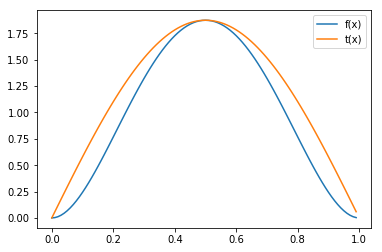

In [2]:
# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False)) #AQUI PONGO LA FUNCION QUE A LA QUE QUIERO MAXIMIZAR, SE QUEDA
#EL NEGATIVO PORQUE ES .MIN Y NEGATIVO Y NEGATIVO DA POSITIVO
# Función t -> Función constante
t = lambda x: max_f*np.sin(np.pi*x) # función constante

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('Funciones, punto máximo:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
plt.show()


2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).


$$g(x)=\frac{t(x)}{c}$$
$$f(x)=30(x^2-2x^3+x^4)$$
$$t(x)=a \sin(\pi x)$$

$$a=max(f(x))$$

$$c=\int_{0}^{1}a sin(\pi x)dx$$
Sacando a
$$c=max(f(x))\int_{0}^{1} sin(\pi x)dx$$
$$c= max(f(x))* [-\frac{cos(\pi y)}{\pi} ]_{0}^{1} = \frac{2}{\pi}max(f(x))$$

$$g(x)=\frac{t(x)}{c}=\frac{max(f(x)) \sin(\pi x)}{\frac{2}{\pi}max(f(x))}=\frac{\pi sin(\pi x)}{2}$$


3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 


$$G(x)= \int_{0}^{x} g(x)dx = \frac{1}{2} \int_{0}^{x} sin(\pi x)$$

$$G(x)=-\frac{1}{2} [cos(\pi x)]^{x}_{0}= \frac{1}{2} (1-cos(\pi x))$$

$$U= \frac{1}{2} (1-cos(\pi x))$$

Despejando...

$$x=2U=(1-cos(\pi x)$$

$$cos(\pi x)+2U =1 $$

$$cos(\pi x)=1 - 2U  $$

$$\pi x= arcos(1 - 2U)  $$

$$x= \frac{arcos(1 - 2U)}{\pi }  $$

4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
![imagen.png](attachment:imagen.png)

In [3]:
import scipy.optimize as opt
import math

In [4]:
def m_alea(N):
    u =np.random.uniform(0,2/np.pi,N)#esto es por un ciclo completo 2pi
    y=list(map(lambda x: (1/np.pi)*np.arccos(1-np.pi*u[x]),range(N)))
    return y

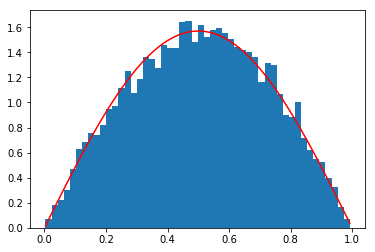

In [5]:
N = 10**4
def plot_hist(N):
    r1=m_alea(N)
    y,x,_=plt.hist(r1, bins=50,density=True)
    y2 =(np.pi*np.sin(np.pi*x))/2 #-(1/np.pi)*(np.cos(np.pi*x))+(1/np.pi)
    plt.plot(x,y2,'r-')
    plt.show()                    #(1/np.pi)*np.arccos(1-np.pi*u[x]),range(N)))

plot_hist(N)

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
![imagen.png](attachment:imagen.png)

In [6]:
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()

El máximo de f es: [1.875]


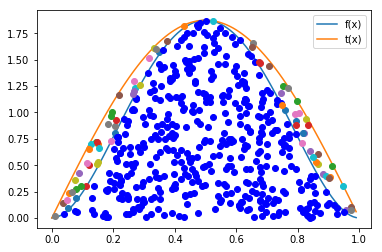

In [7]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante

# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False)) #AQUI PONGO LA FUNCION QUE A LA QUE QUIERO MAXIMIZAR, SE QUEDA
#EL NEGATIVO PORQUE ES .MIN Y NEGATIVO Y NEGATIVO DA POSITIVO
# Función t 
t = lambda x: max_f*np.sin(np.pi*x) # función t en este caso NO ES constante

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 500 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.arccos(1-2*np.random.rand(N))/np.pi

Acep_rechazo(R2,R1,f,t)

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

In [8]:
# Función de aceptación y rechazo usando compresión de listas de pulso senoidal
def Acep_rechazo2(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    cont=np.asarray([1 if condition[i] else 0 for i in range(len(R1))]).sum()
    return cont

ans=(Acep_rechazo2(R2,R1,f,t)/len(R1))*100
ans

84.8

El porcentaje de puntos de aceptación es de $84.8\%$ con pulso senoidal.

In [9]:
# Función de aceptación y rechazo usando compresión de listas de t(x) constante
R2_2=np.random.rand(N)
R1_2=np.random.rand(N)
ans2=(Acep_rechazo2(R2_2,R1_2,f,t)/len(R1))*100
ans2

68.4

El porcentaje de puntos de aceptación es de $68.4\%$ con constante.

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

El máximo de la función es: 2.109375


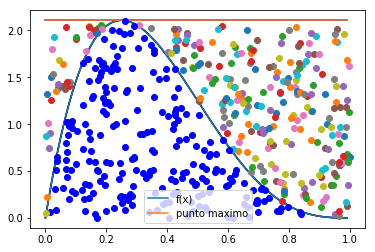

In [10]:
N = 500  # número de puntos
# Función objetivo
f = lambda x: 20*x*(1-x)**3
x = np.arange(0,1,0.01)
plt.plot(x,f(x),'k')
# Encuentro el máximo de la función f
c = float(f(optimize.fmin(lambda x:-f(x),0,disp=False)))
print('El máximo de la función es:',c)

t = lambda x: c*np.ones(len(x))
plt.plot(x,f(x),'k')
plt.plot(x,t(x),'b')
R2 = np.random.rand(N)
R1 = np.random.rand(N)
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='punto maximo')
plt.legend()
Acep_rechazo(R2,R1,f,t)

plt.show()


In [ ]:
borrar lo de abajo

In [ ]:
hola